# Employee Retention Analysis

### Two datasets obtained from exit surveys from employees of the Department of Education, Training and Employment (DETE) and Technical and Further Education Institute (TAFE) in Queensland, Australia, are used here to answer stakeholder questions. The plan is to identify problem areas within the institute and increase retention rates by combining both datasets.

# Introduction
### We'll read in the datasets and take notes of the overall datasets

In [1]:
#Importing necessary modules
import pandas as pd
import numpy as np

In [2]:
#Reading both datasets with UTF-8 encoding using pandas
tafe_survey= pd.read_csv('tafe_survey.csv')
dete_survey=pd.read_csv('dete_survey.csv')

In [790]:
#Identifying the size of each dataset

print("tafe: ")
print(tafe_survey.shape)

print("dete:")
print(dete_survey.shape)


tafe: 
(702, 72)
dete:
(822, 56)


In [791]:
#Quick viewing of the dataset 
pd.options.display.max_columns = 150 #allowing for all the columns to be viewed
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [792]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [793]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [794]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

# Identifying Missing Values, Formatting Errors, and Dropping Unnecessary Columns

### Some observations: The two datasets appear to have different sizes but some similar columns.

### The datasets consists of columns with answers to long follow-up survey questions. I will consider this information to be secondary, and move it to a new dataset for later analysis. 

### Additionally, some values are written as "Not Stated", so those will be corrected

In [795]:
# Correcting the "Not Stated" values
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [796]:
#Creating a new dataset and dropping columns
tafe_survey_long_questions=tafe_survey.iloc[:,18:66]
tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[18:66], axis=1)

In [797]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurren

In [798]:
dete_survey_long_questions=dete_survey.iloc[:,28:49]
dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [799]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

### The columns are formatted differently from one another, so I will standardize them by making all capitalizations lowercase, removing trailing whitespaces, renaming a few columns, and replacing spaces with underscores.

In [800]:
mapping = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
       'Employment Type. Employment Type': 'employment_status',
       'Classification. Classification': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service', 'Main Factor. Which of these was the main factor for leaving?': 'main_factor'}
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis = 1)
tafe_survey_updated=tafe_survey_updated.rename(columns=lambda x: x.strip().lower().replace(" ","_").replace(".",""))

In [801]:
tafe_survey_updated.columns

Index(['id', 'institute', 'workarea', 'cease_date', 'separationtype',
       'contributing_factors_career_move_-_public_sector',
       'contributing_factors_career_move_-_private_sector',
       'contributing_factors_career_move_-_self-employment',
       'contributing_factors_ill_health',
       'contributing_factors_maternity/family',
       'contributing_factors_dissatisfaction',
       'contributing_factors_job_dissatisfaction',
       'contributing_factors_interpersonal_conflict',
       'contributing_factors_study', 'contributing_factors_travel',
       'contributing_factors_other', 'contributing_factors_none',
       'main_factor', 'gender', 'age', 'employment_status', 'position',
       'institute_service', 'role_service'],
      dtype='object')

In [802]:
dete_survey_updated=dete_survey_updated.rename(columns=lambda x: x.strip().lower().replace(" ","_"))
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

# Cleaning Date Columns

### We standardize the date values to a YYYY format

In [803]:
# Viewing the unique values in the column
tafe_survey_updated["cease_date"].value_counts(dropna=False)

2011.0    268
2012.0    235
2010.0    103
2013.0     85
NaN         7
2009.0      4
Name: cease_date, dtype: int64

In [804]:
# Viewing the unique values in the column
dete_survey_updated["cease_date"].value_counts(dropna=False)

2012       344
2013       200
01/2014     43
12/2013     40
09/2013     34
NaN         34
06/2013     27
07/2013     22
10/2013     20
11/2013     16
08/2013     12
05/2013      7
05/2012      6
04/2013      2
07/2014      2
08/2012      2
02/2014      2
04/2014      2
07/2012      1
2014         1
2010         1
07/2006      1
11/2012      1
09/2010      1
09/2014      1
Name: cease_date, dtype: int64

In [805]:
# Using regular expression to clean dates
dete_survey_updated["cease_date"]=dete_survey_updated["cease_date"].replace(to_replace='[0-9][0-9]/',value="",regex=True)
dete_survey_updated["cease_date"].value_counts(dropna=False)

2013    380
2012    354
2014     51
NaN      34
2010      2
2006      1
Name: cease_date, dtype: int64

In [806]:
# Checking for data type
dete_survey_updated["cease_date"].dtypes

dtype('O')

In [807]:
# Changing data type
dete_survey_updated["cease_date"]=dete_survey_updated["cease_date"].astype(float)
dete_survey_updated["cease_date"].dtypes

dtype('float64')

In [808]:
# Checking that our dataset data types match for the cease_date column
tafe_survey_updated["cease_date"].dtypes

dtype('float64')

### After checking all date columns, one value sticks out in the 'role_start_date' column in the DETE dataset. The year is set to 200. We can assume the correct year to be similar to or later than the value in the 'dete_start_date' column. We will view the dataset sorted by 'role_start_date'.

In [809]:
dete_survey_updated['role_start_date'].value_counts(dropna=False)

NaN       98
2012.0    65
2011.0    57
2010.0    46
2008.0    45
2013.0    41
2007.0    41
2009.0    38
2006.0    25
2004.0    22
2005.0    20
2003.0    20
2000.0    20
1999.0    19
1996.0    19
1989.0    18
1992.0    17
2002.0    16
1998.0    15
2001.0    15
1988.0    14
1995.0    13
1997.0    13
1990.0    12
1975.0    12
1986.0    11
1976.0     9
1978.0     9
1993.0     9
1991.0     8
1994.0     7
1979.0     7
1985.0     6
1981.0     5
1987.0     5
1983.0     5
1984.0     4
1982.0     4
1980.0     3
1977.0     2
1970.0     2
1974.0     1
1971.0     1
1973.0     1
200.0      1
1972.0     1
Name: role_start_date, dtype: int64

In [810]:
# Viewing the dataset sorted by 'role_start_date'
dete_survey_updated.sort_values(by="role_start_date")

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
390,391,Resignation-Other employer,2013.0,2000.0,200.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
159,160,Age Retirement,2012.0,1970.0,1970.0,Teacher,Primary,Metropolitan,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Female,61 or older,NaN,NaN,NaN,NaN,NaN
420,421,Age Retirement,2013.0,1970.0,1970.0,Teacher,Primary,Metropolitan,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN
501,502,Ill Health Retirement,2013.0,1971.0,1971.0,Teacher,Secondary,Central Queensland,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,NaN,61 or older,NaN,NaN,NaN,NaN,NaN
638,639,Age Retirement,2014.0,1972.0,1972.0,Teacher,Secondary,Central Office,Education Queensland,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,796,Resignation-Move overseas/interstate,2013.0,NaN,NaN,Cleaner,NaN,NaN,NaN,Permanent Part-time,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
798,800,Resignation-Move overseas/interstate,NaN,1995.0,NaN,Teacher Aide,NaN,Darling Downs South West,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
802,804,Resignation-Move overseas/interstate,2013.0,NaN,NaN,Teacher Aide,NaN,Metropolitan,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
814,816,Age Retirement,2013.0,NaN,NaN,Cleaner,NaN,NaN,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Female,61 or older,NaN,NaN,NaN,NaN,NaN


### By looking at the data, we notice that most rows have role_start_dates equal to dete_start_date. We will impute the value to be 2000.

In [811]:
# Correcting the date value 
dete_survey_updated.iloc[390,4]=2000.0

# Cleaning Age Column Values

### Next, we will investigate and clean the 'age' column. We notice that in the TAFE dataset, the oldest age group is '56 and older', while in the DETE age group, there are two values: '56-60' and '61 or older'. We will standardize the age groups for both datasets and standardize the format.

In [812]:
#Viewing all column values
tafe_survey_updated['age'].value_counts(dropna=False)

56 or older      162
NaN              106
51-55             82
41  45            80
46  50            59
31  35            52
36  40            51
26  30            50
21  25            44
20 or younger     16
Name: age, dtype: int64

In [813]:
#Viewing all column values
dete_survey_updated['age'].value_counts(dropna=False)

61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
NaN               11
20 or younger      1
Name: age, dtype: int64

In [814]:
#Standardizing the age groups
dete_survey_updated['age']=dete_survey_updated['age'].replace({"56-60":"56 or older", "61 or older":"56 or older"})
dete_survey_updated['age'].value_counts(dropna=False)

56 or older      396
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
NaN               11
20 or younger      1
Name: age, dtype: int64

In [815]:
#Cleaning white spaces in data
tafe_survey_updated["age"]=dete_survey_updated["age"].replace(to_replace='\s\s',value="-",regex=True)
tafe_survey_updated['age'].value_counts(dropna=False)

56 or older      336
51-55             87
46-50             57
26-30             52
41-45             48
36-40             44
21-25             35
31-35             34
NaN                8
20 or younger      1
Name: age, dtype: int64

# Cleaning Separation Column Values

### The separation column has three different types of resignations listed, we will merge them under one type. We will also standardize the format among all values

In [816]:
#Viewing separation types
tafe_survey_updated["separationtype"].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

In [817]:
#Viewing separation types
dete_survey_updated["separationtype"].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [818]:
#Combining resignation types and cleaning values
dete_survey_updated["separationtype"]=dete_survey_updated["separationtype"].replace(to_replace='-.*',value="",regex=True)
dete_survey_updated["separationtype"]=dete_survey_updated["separationtype"].replace(to_replace=' \(VER\)',value="",regex=True)
dete_survey_updated["separationtype"].value_counts(dropna=False)

Resignation                   311
Age Retirement                285
Voluntary Early Retirement     67
Ill Health Retirement          61
Other                          49
Contract Expired               34
Termination                    15
Name: separationtype, dtype: int64

# Clean the Work Area Column

In [819]:
#View the values
tafe_survey_updated["workarea"].value_counts(dropna=False)

Non-Delivery (corporate)    432
Delivery (teaching)         270
Name: workarea, dtype: int64

In [820]:
#Standardizing the format
tafe_survey_updated["workarea"]=tafe_survey_updated["workarea"].str.split(' ').str[1].str.split("(").str[1].str.split(")").str[0]

#Alternatively:
#tafe_survey_updated["workarea"]=tafe_survey_updated["workarea"].replace({"Non-Delivery (corporate)":"corporate", "Delivery (teaching)":"teaching"})

tafe_survey_updated["workarea"].value_counts(dropna=False)

corporate    432
teaching     270
Name: workarea, dtype: int64

# Combining the Datasets

### Based off our data, the most common separation type is resignations.
### For this project, since the aim is to figure out if there is some type of dissatisfaction leading to resignations, we will only focus on surveys of people who resigned

In [821]:
# Viewing some overall data with the value with the most counts in each column
print(tafe_survey_updated.describe(include=['O'])) # to include objects instead of float columns

                               institute   workarea separationtype  \
count                                702        702            701   
unique                                12          2              6   
top     Brisbane North Institute of TAFE  corporate    Resignation   
freq                                 161        432            340   

       contributing_factors_career_move_-_public_sector  \
count                                               437   
unique                                                2   
top                                                   -   
freq                                                375   

       contributing_factors_career_move_-_private_sector  \
count                                                437   
unique                                                 2   
top                                                    -   
freq                                                 336   

       contributing_factors_career_move_-_self-emplo

In [822]:
#Create two new datasets with just rows containing a resignation separation type
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

# Length of Service Column

### We want to be able to correlate resignation to years of service, we will create a column containing the length of service. In the TAFE dataset, we already have such column.

In [823]:
#Create a column of length of service by subtracting relevant values
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

# Create Job Dissatisfaction Column

### We will create a new column in each dataset dedicated to boolean values for job dissatisfaction.

### In the TAFE survey, job dissatisfaction is indicated in two columns:
### -contributing_factors_dissatisfaction
### -contributing_factors_job_dissatisfaction

### In the DETE survey, job dissatisfaction is indicated in several columns:
### -job_dissatisfaction
### -dissatisfaction_with_the_department
### -physical_work_environment
### -lack_of_recognition
### -lack_of_job_security
### -work_location
### -employment_conditions
### -work_life_balance
### -workload

In [824]:
tafe_resignations.columns

Index(['id', 'institute', 'workarea', 'cease_date', 'separationtype',
       'contributing_factors_career_move_-_public_sector',
       'contributing_factors_career_move_-_private_sector',
       'contributing_factors_career_move_-_self-employment',
       'contributing_factors_ill_health',
       'contributing_factors_maternity/family',
       'contributing_factors_dissatisfaction',
       'contributing_factors_job_dissatisfaction',
       'contributing_factors_interpersonal_conflict',
       'contributing_factors_study', 'contributing_factors_travel',
       'contributing_factors_other', 'contributing_factors_none',
       'main_factor', 'gender', 'age', 'employment_status', 'position',
       'institute_service', 'role_service'],
      dtype='object')

In [825]:
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service'],
      dtype='object')

In [832]:
# Adding True, False, or NaN values to dissatisfaction column
def boolean_dissat(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
tafe_resignations['dissatisfied'] = tafe_resignations[['contributing_factors_dissatisfaction', 'contributing_factors_job_dissatisfaction']].applymap(boolean_dissat).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

# Check the unique values
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [833]:
# Adding True, False, or NaN values to dissatisfaction column
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [834]:
# Add an institute column
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [835]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

# Verify the number of non null values in each column
combined.notnull().sum().sort_values()

torres_strait                                           0
south_sea                                               3
aboriginal                                              7
disability                                              8
nesb                                                    9
business_unit                                          32
main_factor                                            96
classification                                        161
region                                                265
role_start_date                                       271
dete_start_date                                       283
role_service                                          290
relocation                                            311
work_life_balance                                     311
traumatic_incident                                    311
ill_health                                            311
study/travel                                          311
none_of_the_ab

In [836]:
combined_updated = combined.dropna(thresh = 500, axis =1).copy()

In [837]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
14.0                   6
10.0                   6
12.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
24.0                   4
11.0                   4
23.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
25.0                   2
26.0                   2
36.0                   2
28.0                   2
30.0                   2


In [838]:
# Extract the years of service and convert the type to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [839]:
# Convert years of service to categories
def transform_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)

# Quick check of the update
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

In [840]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [853]:
combined_updated['employment_status'].value_counts(dropna=False)


Permanent Full-time    256
Permanent Part-time    150
Temporary Full-time    120
NaN                     54
Temporary Part-time     37
Contract/casual         29
Casual                   5
Name: employment_status, dtype: int64

In [857]:
combined_updated['employment_cat'] = combined_updated['employment_status'].copy().replace({"Permanent Full-time":"Permanent","Permanent Part-time":"Permanent",
 "Temporary Full-time":"Temporary", "Temporary Part-time": "Temporary", "Contract/casual":"Contract", "Casual":"Contract"})
combined_updated['employment_cat'].value_counts(dropna=False)


Permanent    406
Temporary    157
NaN           54
Contract      34
Name: employment_cat, dtype: int64

In [858]:
combined_updated.columns

Index(['id', 'separationtype', 'cease_date', 'position', 'employment_status',
       'gender', 'age', 'institute_service', 'dissatisfied', 'institute',
       'institute_service_up', 'service_cat', 'employment_cat'],
      dtype='object')

In [859]:
combined_updated['age']

0            36-40
1            41-45
2            31-35
3            46-50
4            31-35
          ...     
646          26-30
647          51-55
648          41-45
649    56 or older
650          46-50
Name: age, Length: 651, dtype: object

<AxesSubplot:xlabel='Count', ylabel='institute_service_up'>

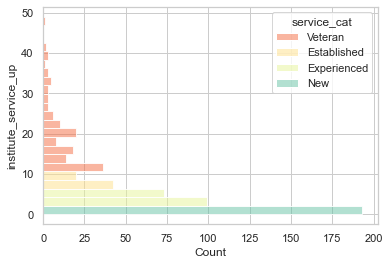

In [903]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=combined_updated, y="institute_service_up",hue="service_cat", hue_order=["Veteran","Established","Experienced","New"],palette="Spectral")

# Retention is disproportionately affected in the first two years
# # Add a legend and informative axis label
# ax.legend(ncol=2, loc="lower right", frameon=True)
# ax.set(xlim=(0, 24), ylabel="",
#        xlabel="Automobile collisions per billion miles")
# sns.despine(left=True, bottom=True)

<AxesSubplot:xlabel='institute_service_up', ylabel='Count'>

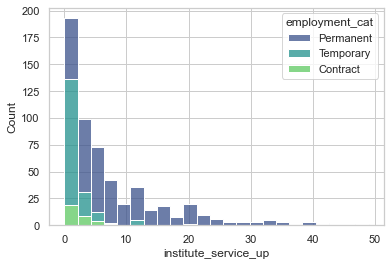

In [898]:
sns.histplot(data=combined_updated, x="institute_service_up",hue="employment_cat",multiple="stack",palette="viridis")

In [884]:
combined_updated["age"].value_counts()

56 or older      224
41-45             75
51-55             72
46-50             65
36-40             65
26-30             51
31-35             47
21-25             43
20 or younger      1
Name: age, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '36-40'),
  Text(1, 0, '41-45'),
  Text(2, 0, '31-35'),
  Text(3, 0, '46-50'),
  Text(4, 0, '56 or older'),
  Text(5, 0, '51-55'),
  Text(6, 0, '21-25'),
  Text(7, 0, '26-30'),
  Text(8, 0, '20 or younger')])

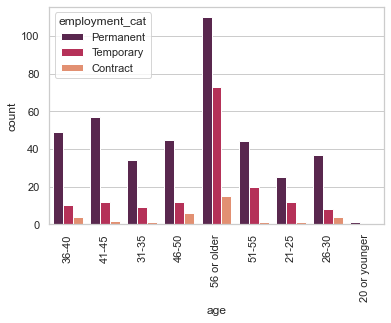

In [897]:
sns.countplot(x="age", hue="employment_cat", data=combined_updated, palette="rocket")
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Established'),
  Text(1, 0, 'Veteran'),
  Text(2, 0, 'Experienced'),
  Text(3, 0, 'New')])

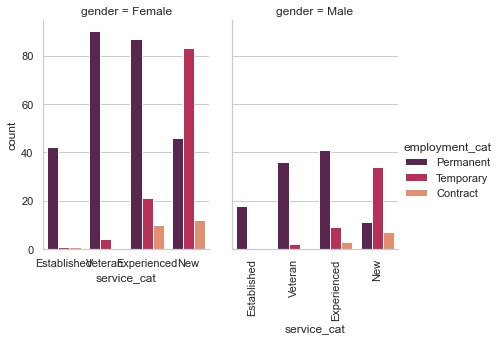

In [902]:
sns.catplot(x="service_cat", hue="employment_cat", data=combined_updated, palette="rocket", col="gender", kind="count", height=4, aspect=.7)
plt.xticks(rotation=90)

ValueError: could not convert string to float: 'service_cat'

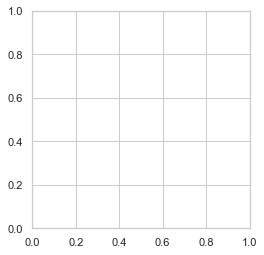

In [905]:
# #define data
# data = "service_cat"
# labels = ["Veteran","Established","Experienced","New"]
# #define Seaborn color palette to use
# colors = sns.color_palette('pastel')[0:4]

# #create pie chart
# plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
# plt.show()